<a href="https://colab.research.google.com/github/Ejeat12/Profolio/blob/main/Textual_Entailment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# For this project I will be fine-tuning a built-in transformers model for recognizing textual entailment.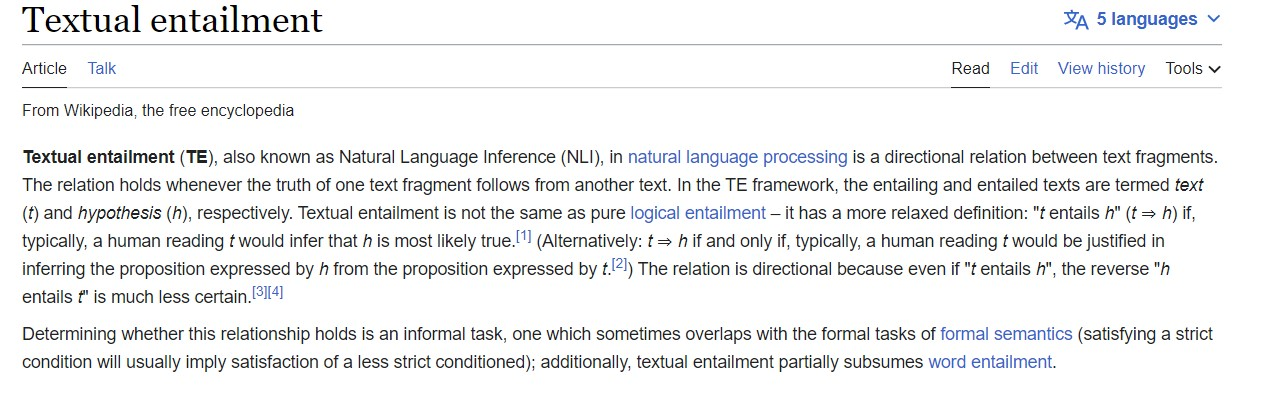

# Step 1: Install the transformers library

In [2]:
!pip install transformers datasets
from datasets import load_dataset


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Step 2: load in the RTE dataset.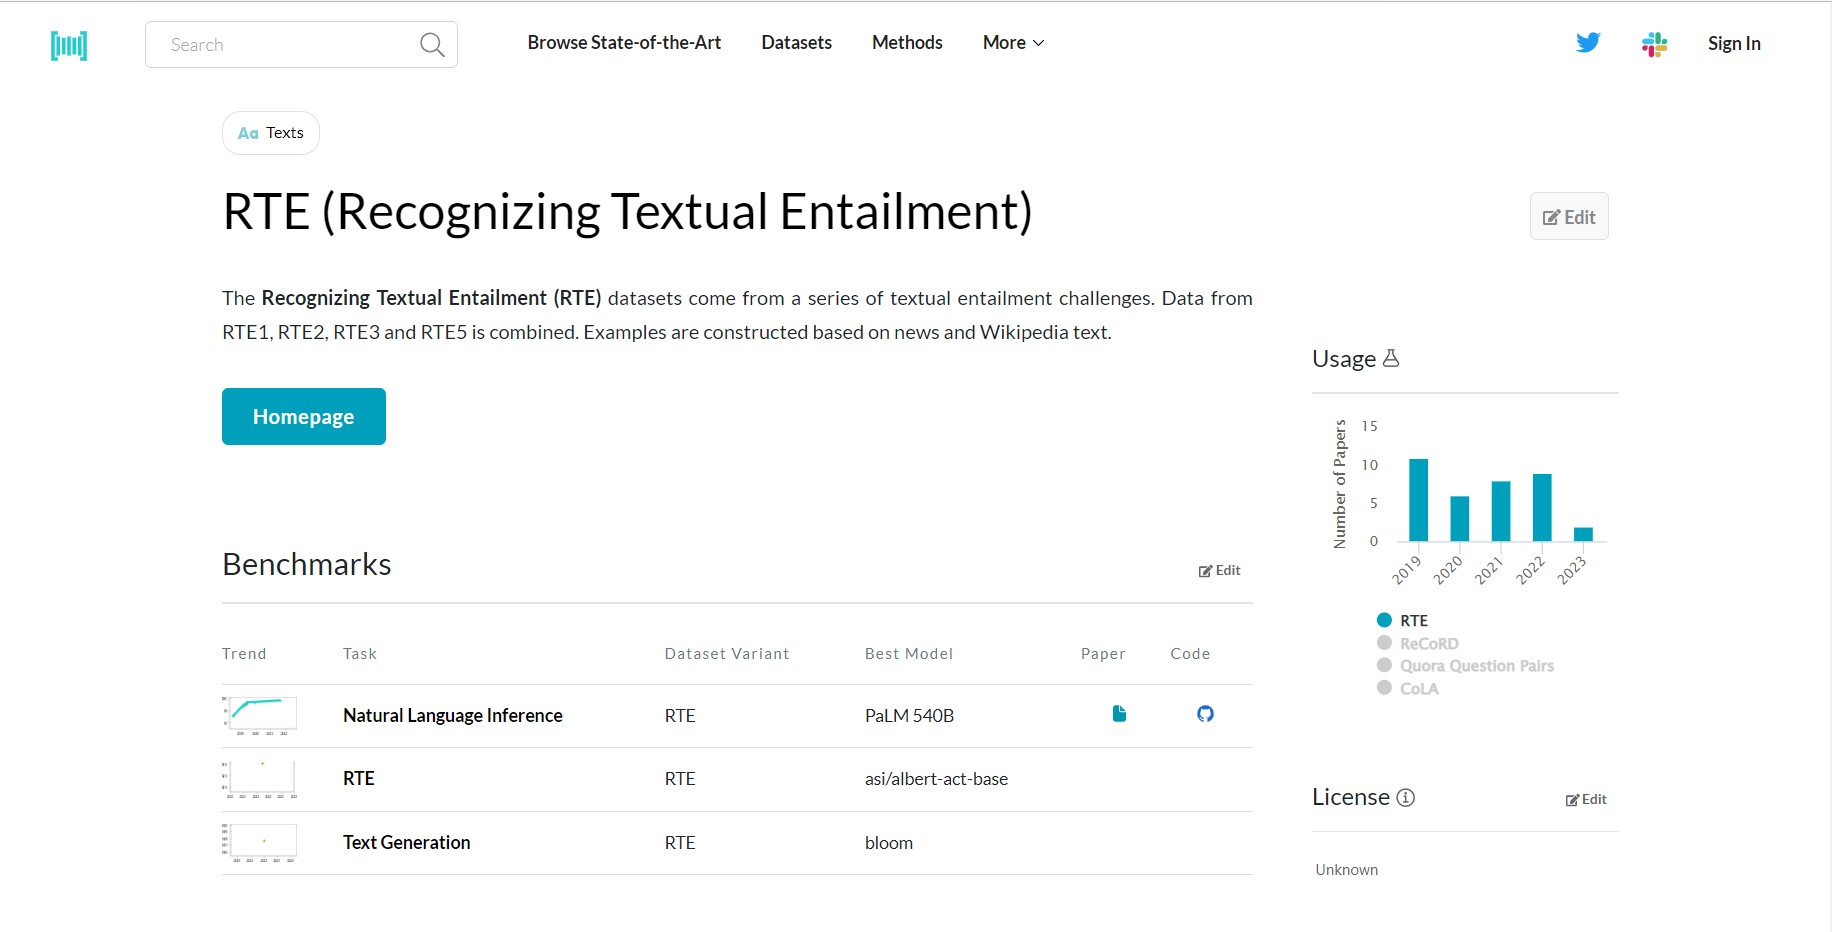

In [3]:
data = load_dataset("glue", "rte")

  0%|          | 0/3 [00:00<?, ?it/s]

# Step 3: Define a checkpoint for the pre-trained model from transformers.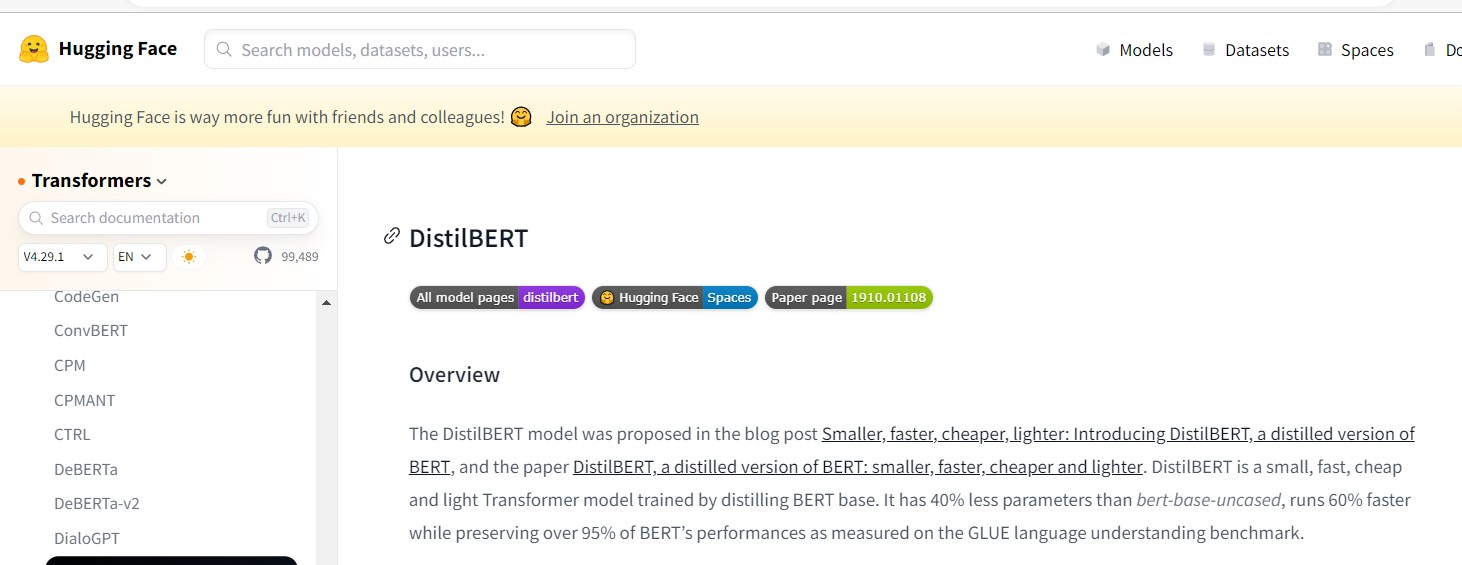

In [4]:
checkpoint = "distilbert-base-cased"

# Step 4: Install the necessary functions from transfomers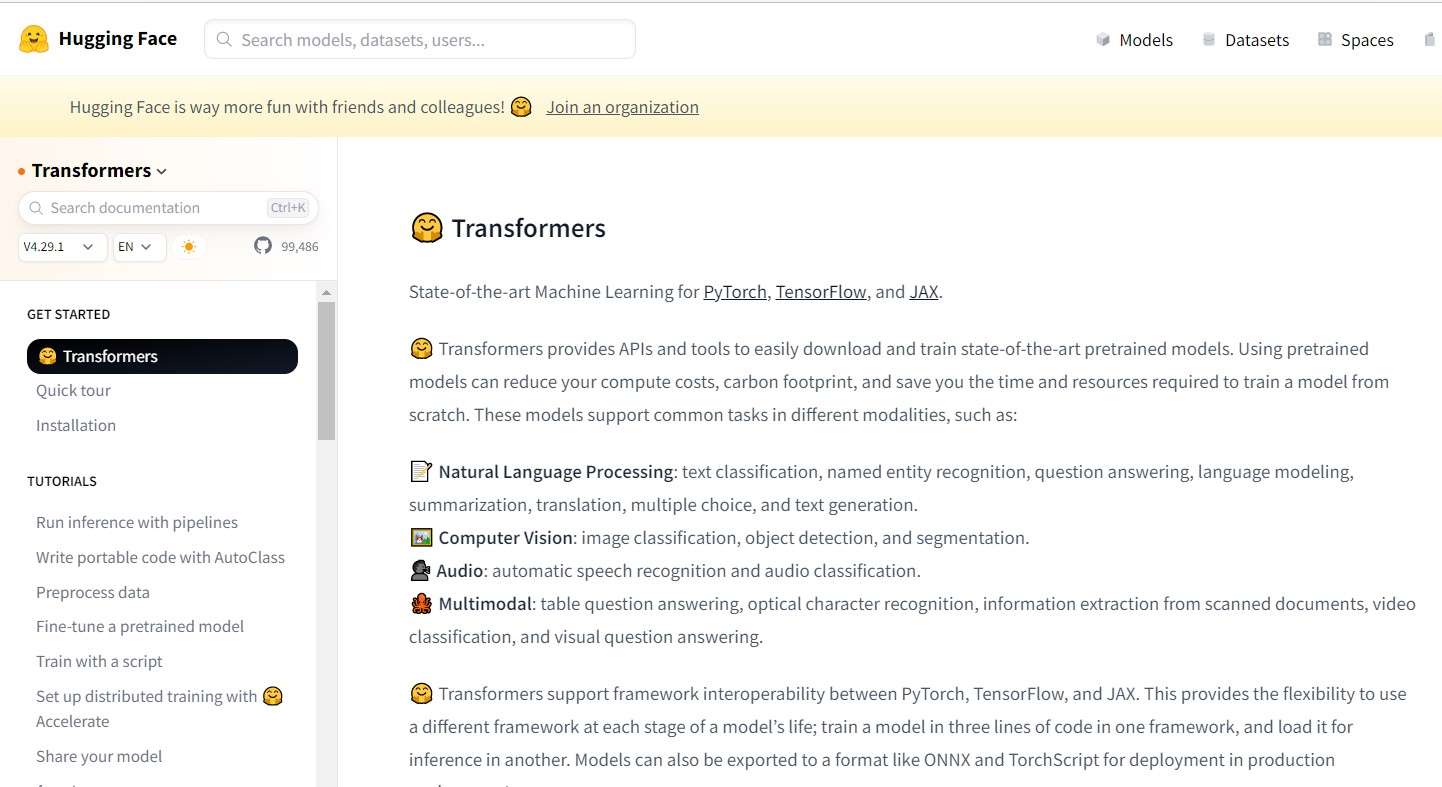

In [5]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments

# Step 5: Set up the appropriate tokenizer for the checkpoint we defined.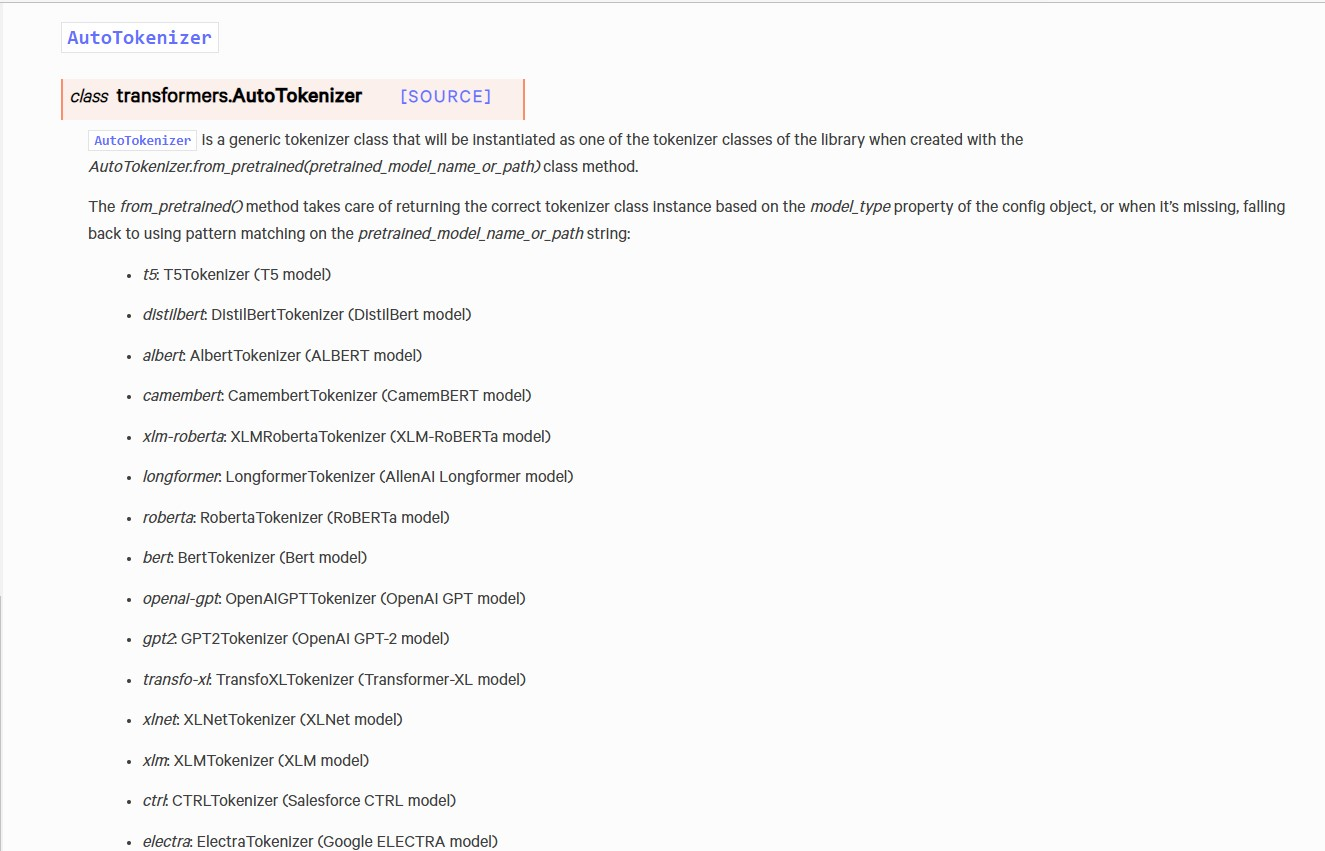

In [6]:
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

# Step 6: Create a model from the pre-trained transformers library.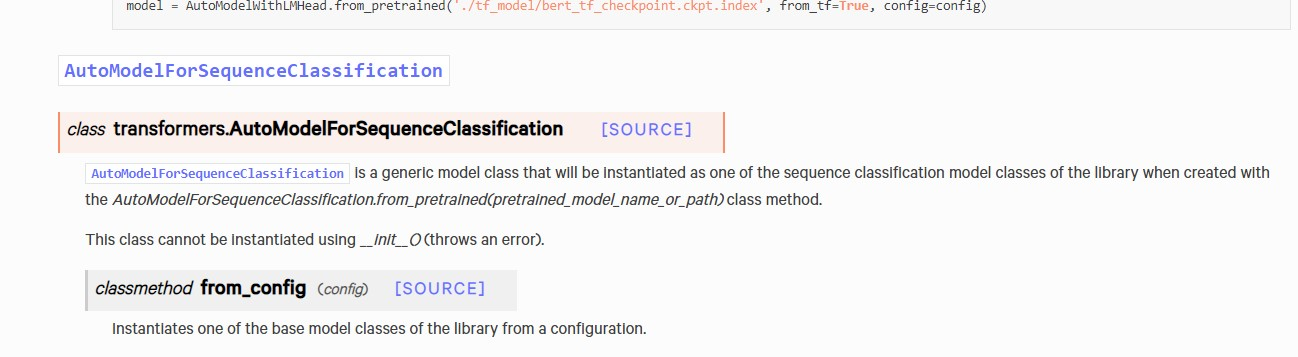

In [7]:
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels = 2)

Some weights of the model checkpoint at distilbert-base-cased were not used when initializing DistilBertForSequenceClassification: ['vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_projector.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['pre_classifier.bias', 'classifier.bias', 'classifier.weigh

# Step 7: Set up the training arguments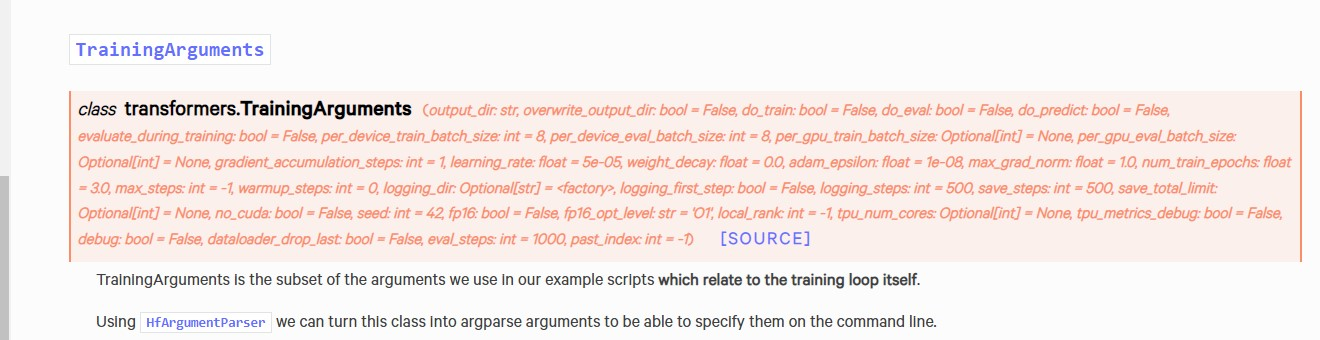

In [8]:

!pip install accelerate -U

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
training_args = TrainingArguments(
    output_dir = "training_dir",
    evaluation_strategy = "epoch",
    save_strategy = "epoch",
    num_train_epochs = 5,
    per_device_train_batch_size = 16,
    per_device_eval_batch_size = 64,
    logging_steps = 150
)

# Step 8. Compute metrics such as accuracy and f1-score.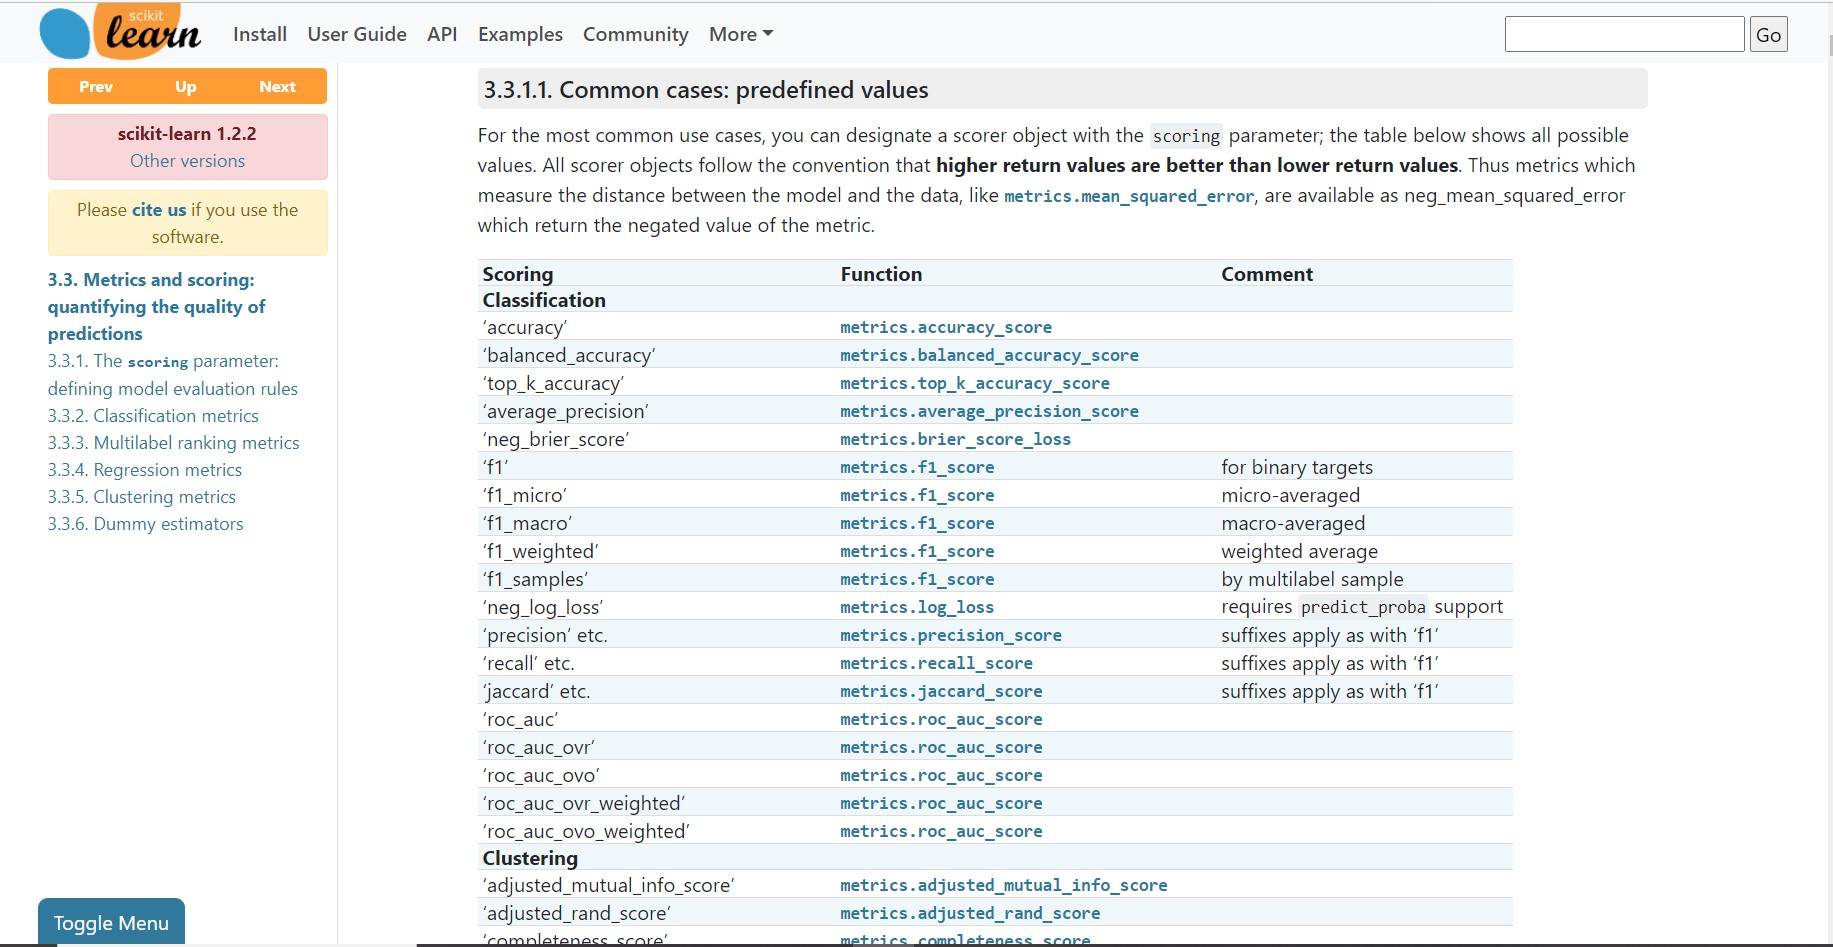

In [11]:
from sklearn.metrics import f1_score
import numpy as np

def compute_metrics(logits_and_labels):
  logits, labels = logits_and_labels
  predictions = np.argmax(logits, axis = -1)
  accuracy = np.mean(predictions == labels)
  f1 = f1_score(labels, predictions)
  return {"accuracy": accuracy, "f1": f1}



# Step 9. Map the entire dataset into a tokenizer function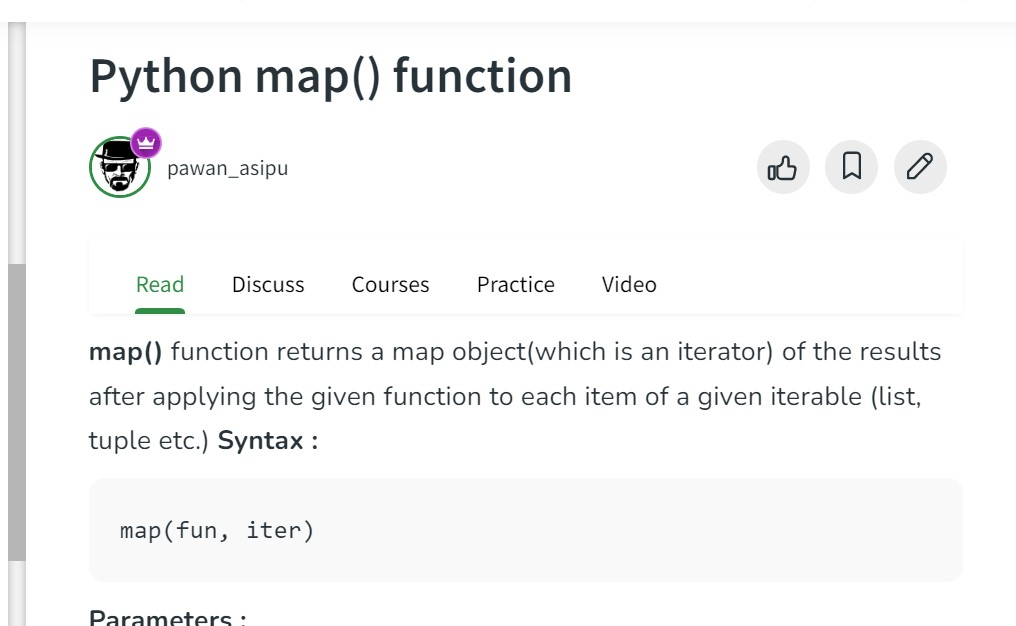

In [12]:
def tokenize_function(batch):
  return tokenizer(batch['sentence1'], batch['sentence2'], truncation = True)

tokenized_data = data.map(tokenize_function, batched = True)

Map:   0%|          | 0/2490 [00:00<?, ? examples/s]

Map:   0%|          | 0/277 [00:00<?, ? examples/s]

Map:   0%|          | 0/3000 [00:00<?, ? examples/s]

# Step 10. Train the model and test it's accuracy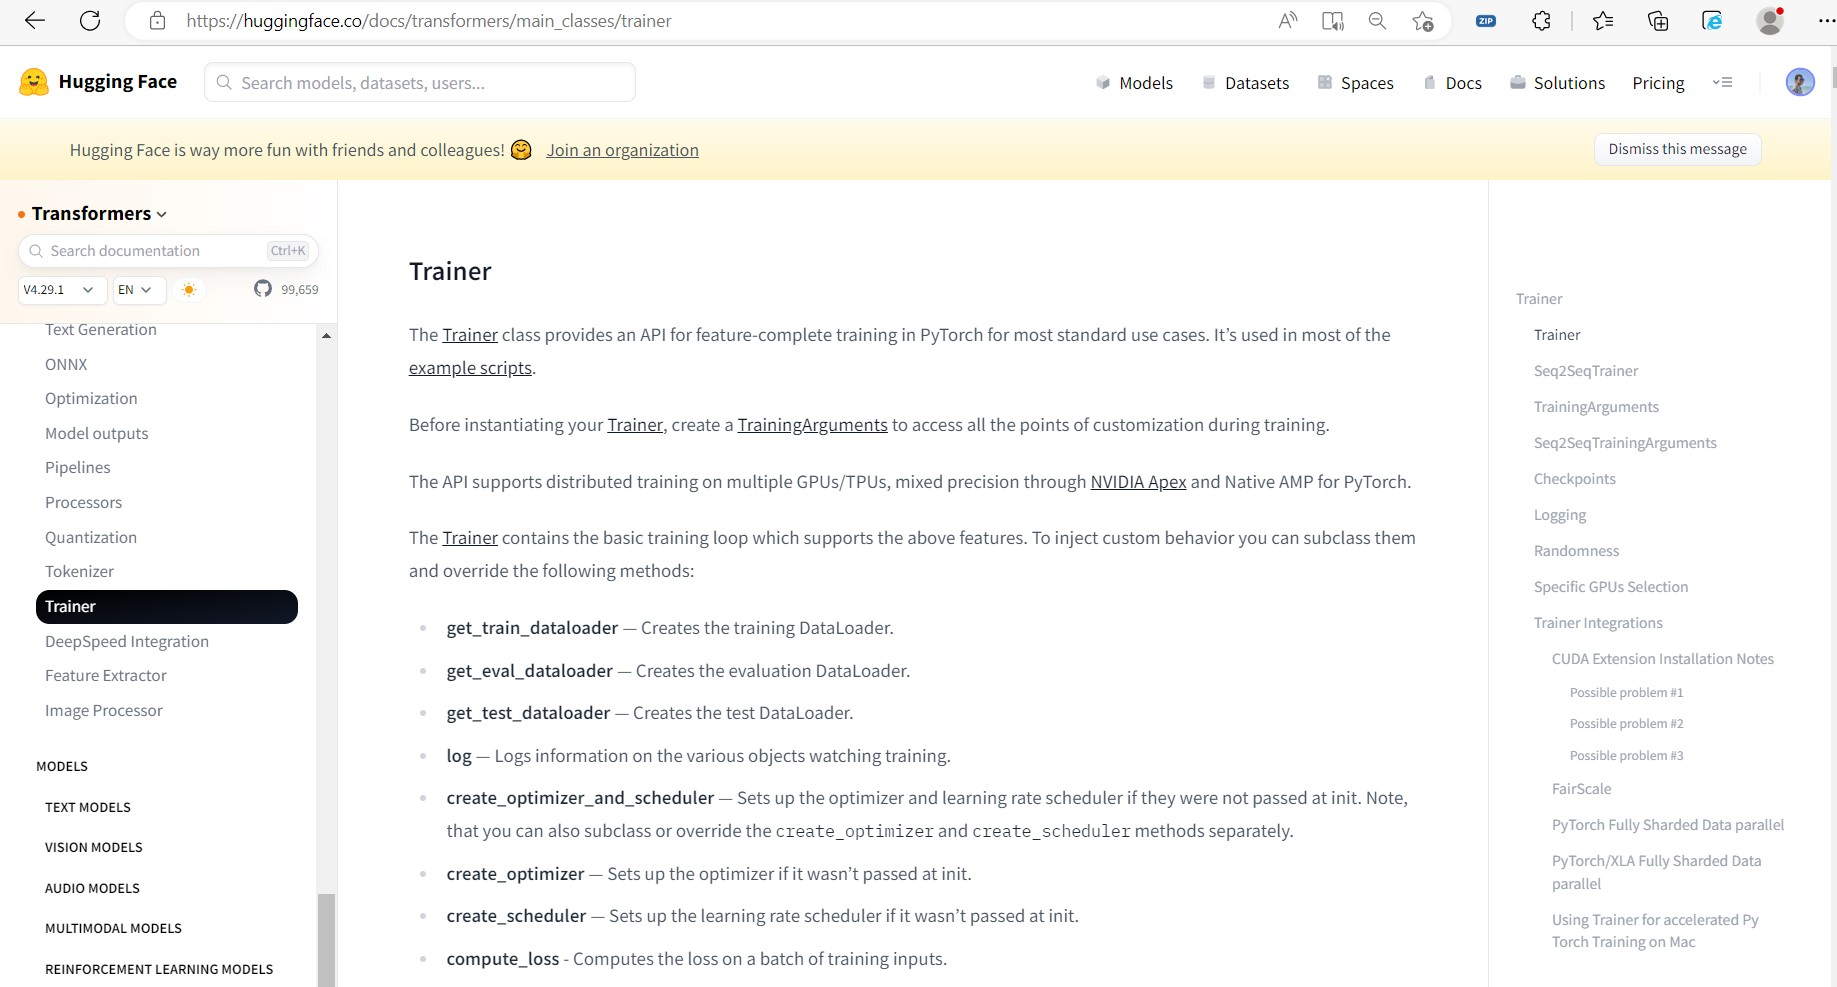

In [13]:
trainer = Trainer(
    model,
    training_args,
    tokenizer = tokenizer,
    train_dataset = tokenized_data['train'],
    eval_dataset = tokenized_data['validation'],
    compute_metrics = compute_metrics
)

In [15]:
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:407: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
You're using a DistilBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.696300,0.712823,0.476534,0.643735
2,0.652200,0.719147,0.509025,0.291667
3,0.419000,0.895404,0.599278,0.543210
4,0.211000,1.543930,0.620939,0.631579
5,0.098300,1.797438,0.638989,0.615385


TrainOutput(global_step=780, training_loss=0.40302450962555714, metrics={'train_runtime': 201.1541, 'train_samples_per_second': 61.893, 'train_steps_per_second': 3.878, 'total_flos': 543568586467824.0, 'train_loss': 0.40302450962555714, 'epoch': 5.0})